In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from gen_euler_estimator import EulerEstimator

In [20]:
def dS_dt(t, state):
    return -1 * state['I'] * state['S'] * 0.01 * 0.03

def dI_dt(t, state):
    return state['I'] * state['S'] * 0.01 * 0.03 - 0.02 * state['I']

def dR_dt(t, state):
    return 0.02 * state['I']

derivatives = {
    'S': dS_dt,
    'I': dI_dt,
    'R': dR_dt
}

In [21]:
initial_state = {'S': 1000, 'I': 1, 'R': 0}
model = EulerEstimator(derivatives)

(0.0, 1000.0)

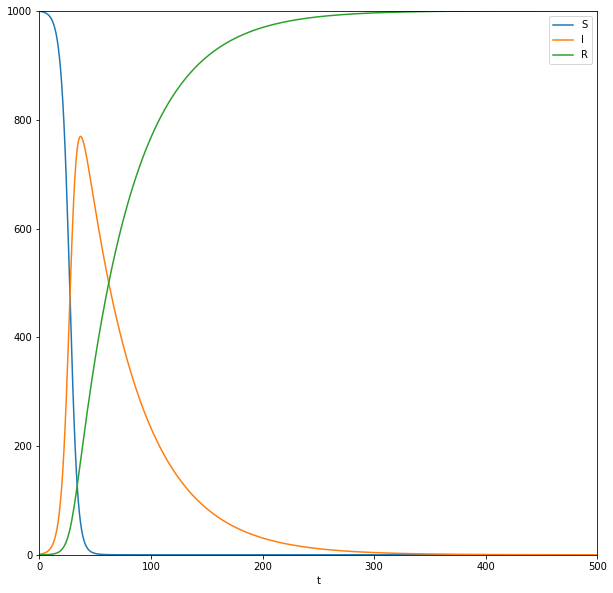

In [28]:
estimated_points = model.calc_estimated_points((0, initial_state), 1, 500)
state_dict = {function: [point[1][function] for point in estimated_points] for function in model.functions}
t_list = [point[0] for point in estimated_points]
df_dict = {'t': t_list}
df_dict.update(state_dict)
df = pd.DataFrame(df_dict)
plot = df.plot(x="t", figsize=(10, 10))
plt.xlim((0,500))
plt.ylim((0,1000))